In [1]:
import numpy as np
import matplotlib.pyplot as plt

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [10]:
import numpy as np
from math import ceil, floor, sqrt
 
class CUBE(object):
  def __init__(self, fname):
    f = open(fname, 'r')
    for i in range(2): f.readline() # echo comment
    tkns = f.readline().split() # number of atoms included in the file followed by the position of the origin of the volumetric data
    self.natoms = int(tkns[0])
    self.origin = np.array([float(tkns[1]),float(tkns[2]),float(tkns[3])])
# The next three lines give the number of voxels along each axis (x, y, z) followed by the axis vector.
    tkns = f.readline().split() #
    self.NX = int(tkns[0])
    self.X = np.array([float(tkns[1]),float(tkns[2]),float(tkns[3])])
    tkns = f.readline().split() #
    self.NY = int(tkns[0])
    self.Y = np.array([float(tkns[1]),float(tkns[2]),float(tkns[3])])
    tkns = f.readline().split() #
    self.NZ = int(tkns[0])
    self.Z = np.array([float(tkns[1]),float(tkns[2]),float(tkns[3])])
# The last section in the header is one line for each atom consisting of 5 numbers, the first is the atom number, second (?), the last three are the x,y,z coordinates of the atom center. 
    self.atoms = []
    for i in range(self.natoms):
      tkns = f.readline().split()
      self.atoms.append([tkns[0], tkns[2], tkns[3], tkns[4]])
# Volumetric data
    self.data = np.zeros((self.NX,self.NY,self.NZ))
    i=0
    for s in f:
      for v in s.split():
        self.data[i//(self.NY*self.NZ), (i//self.NZ)%self.NY, i%self.NZ] = float(v)
        i+=1
    if i != self.NX*self.NY*self.NZ: raise NameError("FSCK!")


In [64]:
cube1=CUBE('1.0.cube')
cube2=CUBE('0.2.cube')
cube3=CUBE('0.0.cube')

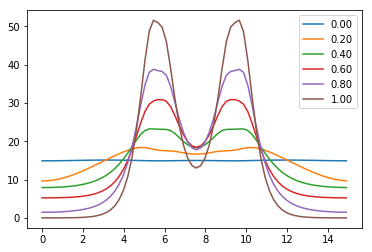

In [71]:
for mix in '0.00 0.20 0.40 0.60 0.80 1.00'.split():
    cube = CUBE('N2/%s/DENSITY.cube' % mix)
    q = cube.data.sum(axis=1).sum(axis=1)
    plt.plot(cube.X[0]*np.arange(len(q)), q, label=mix)
plt.legend()

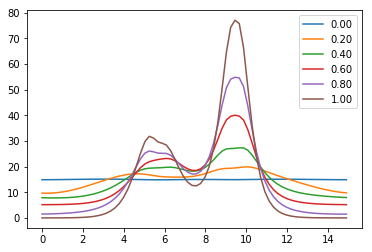

In [72]:
for mix in '0.00 0.20 0.40 0.60 0.80 1.00'.split():
    cube = CUBE('CO/%s/DENSITY.cube' % mix)
    q = cube.data.sum(axis=1).sum(axis=1)
    plt.plot(cube.X[0]*np.arange(len(q)), q, label=mix)
plt.legend()

In [100]:
def get_rhotilde(molname):
    densities = []
    lvals = []
    for mix in '0.00 0.20 0.40 0.60 0.80 1.00'.split():
        lvals.append(float(mix))
        cube = CUBE('%s/%s/DENSITY.cube' % (molname, mix))
        densities.append(cube.data)
    dviews = [_.reshape(-1) for _ in densities]
    rhotilde = np.trapz(np.array(dviews).T, np.array(lvals)).reshape(densities[0].shape)
    return cube, rhotilde

In [140]:
def get_energies(zs, rhotilde):
    coords = np.array([[5.669178, 7.558904  ,  7.558904], [9.448631,    7.558904,    7.558904]])
    energies = np.zeros(2)
    for x in np.arange(cube.NX):
        for y in np.arange(cube.NY):
            for z in np.arange(cube.NZ):
                ds = np.linalg.norm(np.array([x*cube.X[0],y*cube.Y[1],z*cube.Z[2]]) - coords, axis=1)
                for site in (0, 1):
                    energies[site] += zs[site] * rhotilde[x, y, z] / ds[site]
    return energies*cube.X[0]*cube.Y[1]*cube.Z[2]
cube, rhotilde = get_rhotilde('CO')
get_energies((6, 8), rhotilde)

array([18.41797541, 34.96721769])

In [139]:
#cube, rhotilde = get_rhotilde('N2')
get_energies((7, 7), rhotilde)

array([25.92627905, 25.5594829 ])

In [141]:
-21.31323759 - (-0.65931543)

-20.65392216

In [146]:
get_energies((8, 6), rhotilde)

array([24.55730055, 26.22541327])

In [150]:
 (E1=A-S+R)     ELECTROSTATIC ENERGY =          -16.68735241 A.U.
 (S)                           ESELF =           17.28749882 A.U.
 (R)                             ESR =            0.01038409 A.U.

SyntaxError: invalid syntax (<ipython-input-150-965fedf74d7e>, line 1)

In [151]:
-16.68735241+17.28749882-0.01038409, 0.01268778

(0.5897623200000007, 0.01268778)

In [152]:
-21.31323759--0.65931543

-20.65392216